In [1]:
import os
from hydra import initialize, compose
from pyrootutils import pyrootutils
from os import path

%load_ext autoreload
%autoreload 2
import h5py
import numpy as np
from omegaconf import ListConfig, DictConfig

from src.data.dataset.dynamic_sys_dataset import DynamicSystemTrajectoriesGenerator
from src.data.noise_adders import ProcessAndObservationNoiseAdder
from src.systems.systems.van_der_pol import VanDerPol
from src.utils.torch_utils import t2np
from src.utils.visualization.dynamic_system import visualize_nd_trajectories
from src.data.dataset.base import BasePckHdf5Loader

root = pyrootutils.setup_root(os.path.abspath(''), indicator=".project-root", pythonpath=True)
config_path = os.path.relpath(os.path.join(root, "configs"), os.path.abspath(''))
with initialize(version_base=None, config_path=config_path):
    cfg = compose(overrides=[], config_name="notebook")

100%|██████████| 300/300 [06:27<00:00,  1.29s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\md062091\PycharmProjects\ma-cnp\src\utils\visualization\dynamic_system.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


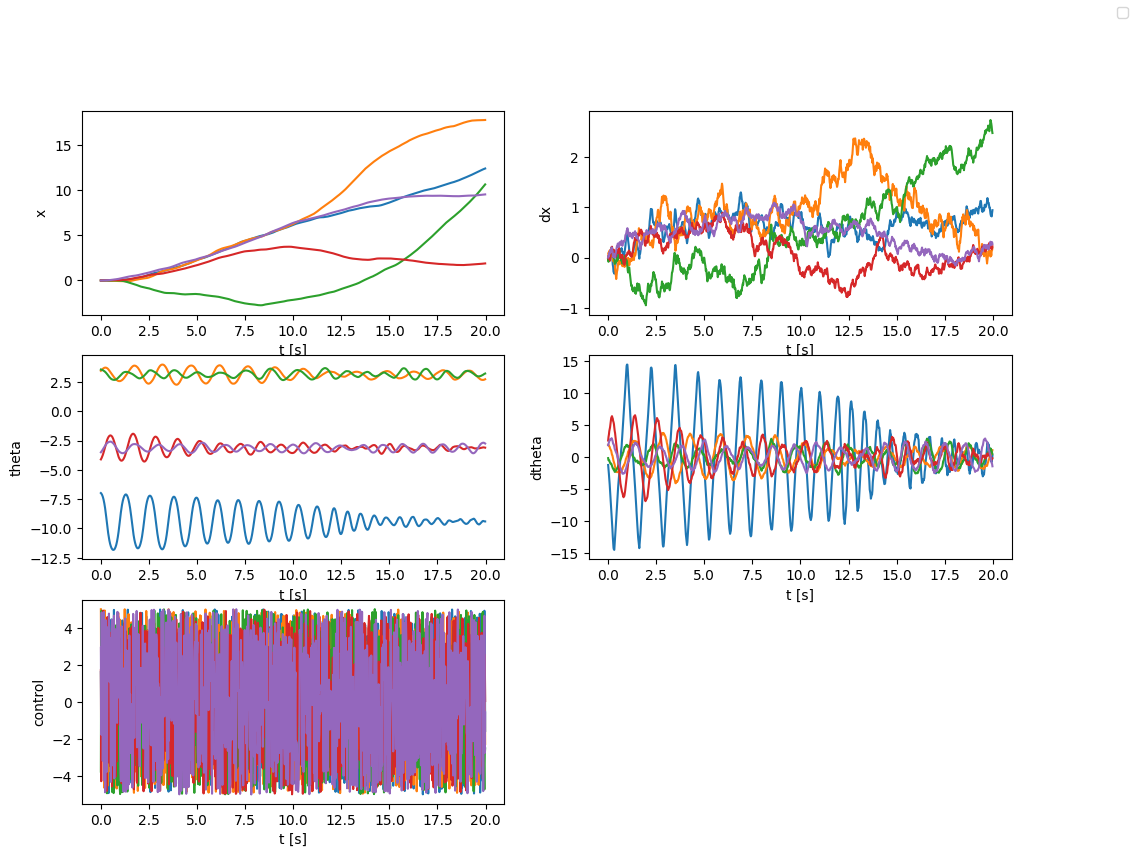

In [3]:
#Multi change: L, m and M

from src.systems.systems.inverted_pendulum import InvertedPendulum
from src.data.parameter_changer import ConstantParameter, SingleRandomParameterChange

data_path = os.path.join(cfg.paths.data_dir, "invP-eval-varLmM/single-trajectories/pN-rC-oneChange-trajectories")
os.makedirs(data_path, exist_ok=True)
size = 300
dset = DynamicSystemTrajectoriesGenerator(
    InvertedPendulum(),
    number_samples=size,
    parameter_sample_ranges={"L": [0.1, 0.5], "m": [0.1, 0.5], "M": [0.5, 2], "pole_friction": 0.001, "cart_friction": 0.01},
    parameter_changer=SingleRandomParameterChange([600, 601], [0.1, 0.11], ["L", "m", "M"]),# Change will be at step 600
    state_sample_ranges={"trajectory": [ [ -0.001, 0.001 ], [ -0.001, 0.001 ], [ -12, 12 ], [ -3, 3 ] ]},
    total_number_of_points=1000,
    number_unrolls_per_sample=1,
    noise_adder=ProcessAndObservationNoiseAdder(0, 0, 0.01, 0.01),
    control_sample_ranges=[[-5, 5]],
    progress_bar=True)
dset.save(os.path.join(data_path, f"test.hdf5"))

data = BasePckHdf5Loader(path=os.path.join(data_path,"test.hdf5"), preload=True)
visualize_nd_trajectories(data["x"][np.random.randint(0, len(data), 5)],
                          channel_names=["x", "dx","theta", "dtheta", "control"],
                          delta_t=0.02)